## Day 26 Lecture 1 Assignment

In this assignment, we will learn about linear regression models and how to plot them using the statsmodels library

In [0]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()

We will load the dataset below that describes the antioxidant quality of lager.

The variables are as follows:
    
The dataset contains 7 variables :

- tpc - Total phenolic content
- ma - melanoidin content
- dsa - DPPH radical scavenging activity
- asa - ABTS radical cation scavenging activity
- orac - Oxygen radical absorbance activity
- rp - Reducing Power
- mca - Metal Chelaing Activity

In [0]:
lager = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lager_antioxidant_reg.csv')

In [6]:
lager.head()

,beer,tpc,ma,dsa,asa,orac,rp,mca
0,1,148.23,13.37,0.66,0.81,3.81,0.45,10.65
1,2,160.38,10.96,0.63,0.64,2.85,0.41,15.47
2,3,170.41,9.22,0.62,0.81,3.34,0.48,15.70
3,4,208.65,9.65,0.90,1.01,3.34,0.50,76.65
4,5,146.03,11.72,0.64,0.90,3.18,0.47,9.39


We would like to predict the level of total phenolic content using the remaining 6 variables.

Start by removing the beer column since this column is the id for the observations.

In [0]:
# answer below:
lager.drop(['beer'], axis = 1, inplace=True)

Next check the data to make sure there is no missing data. Remove rows containing missing data if it exists.

In [8]:
# answer below:
lager.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
tpc     40 non-null float64
ma      40 non-null float64
dsa     40 non-null float64
asa     40 non-null float64
orac    40 non-null float64
rp      40 non-null float64
mca     40 non-null float64
dtypes: float64(7)
memory usage: 2.3 KB


Plot the scatter matrix for all variables in the dataset. Do all variables have a pairwise linear relationship?

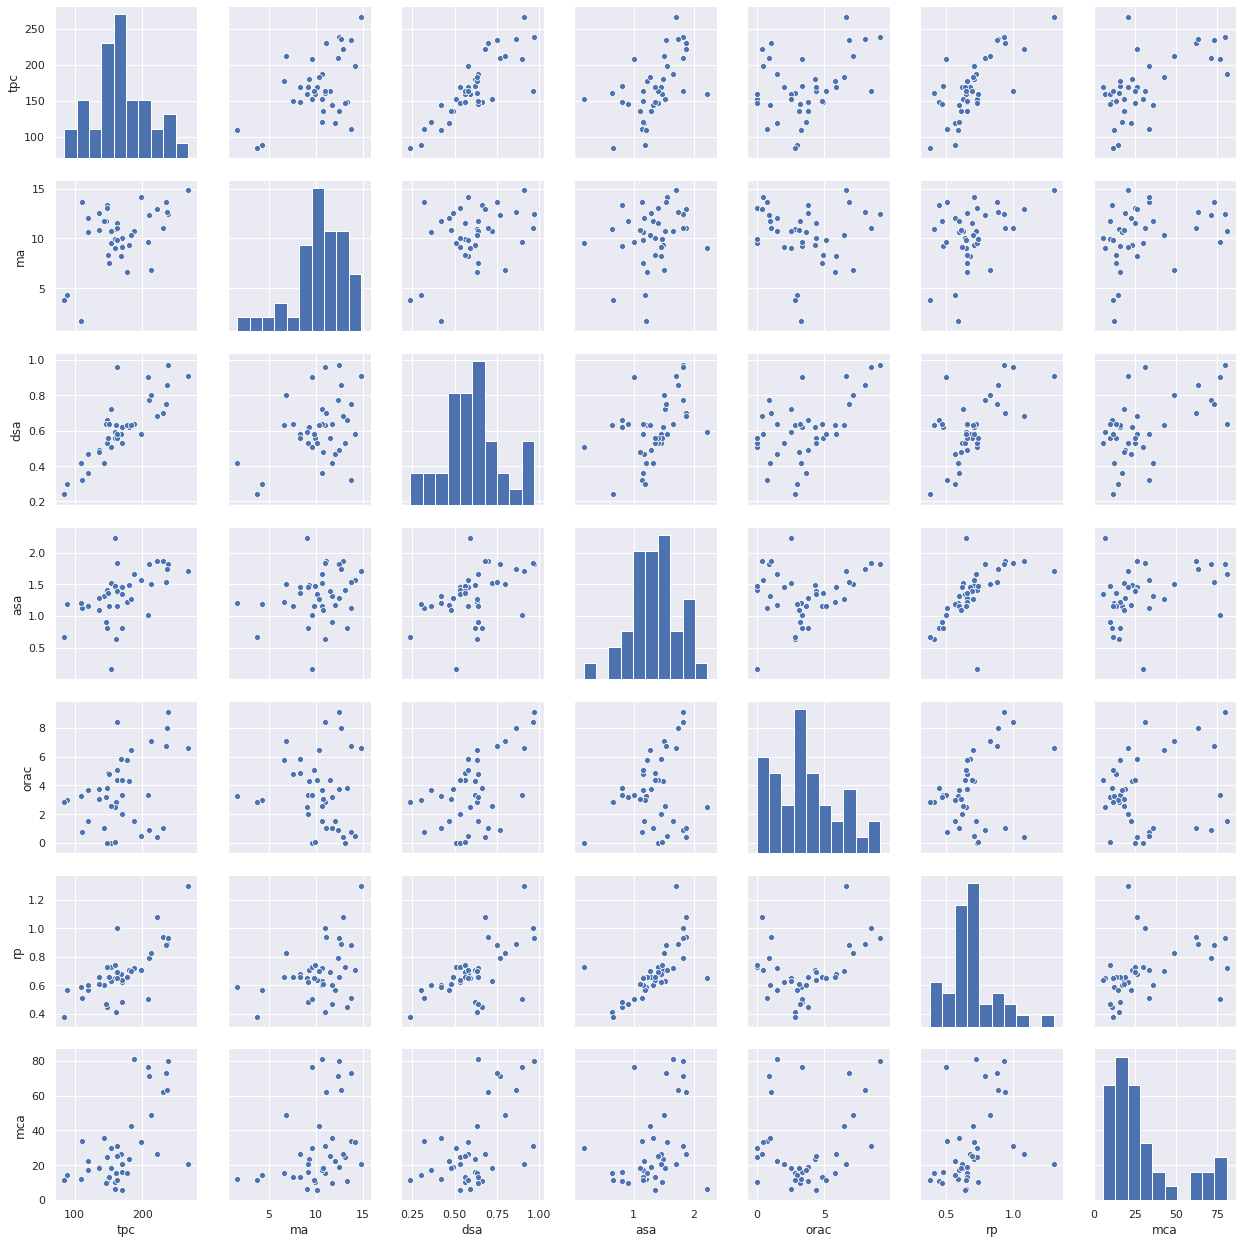

In [9]:
# answer below:
sns.pairplot(data= lager)


We would like to split the data into train and test samples. Use `tpc` as the y column and split the data with 25% of the data in the test sample.

In [0]:
# answer below:
x = lager.drop(['tpc'], axis = 1)
y = lager['tpc']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=25)


Using statsmodels, train the model and print out a summary

In [11]:
# answer below:
# run OLS from stats
import statsmodels.api as sm

# We need to manually add a constant
# in statsmodels' sm
x = sm.add_constant(x)

results = sm.OLS(y, x).fit()

results.summary()



/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tpc   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     25.37
Date:                Mon, 04 Nov 2019   Prob (F-statistic):           4.88e-11
Time:                        18:20:34   Log-Likelihood:                -171.01
No. Observations:                  40   AIC:                             356.0
Df Residuals:                      33   BIC:                             367.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.0497     15.214      1.252      0.219     -11.903      50.002
ma             1.2879      1.283      1.004      0.323      -1.323       3.899
dsa          125.3384     29.710      4.219      0.000      64.892     185.785
asa           -0.9237     10.407     -0.089      0.930     -22.097      20.250
orac          -0.9326      1.609     -0.580      0.566      -4.205       2.340
rp            76.6169     25.540      3.000      0.005      24.656     128.578
mca            0.3804      0.168      2.259      0.031       0.038       0.723
==============================================================================
Omnibus:                       22.280   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               41.942
Skew:                          -1.434   Prob(JB):                     7.80e-10
Kurtosis:                       7.116   Cond. No.                         404.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Create a linear model and evaluate its assumptions

In [0]:
from sklearn import linear_model
from scipy.stats import boxcox

lager_mod = linear_model.LinearRegression()
lager_mod.fit(x, y)
lager_pred = lager_mod.predict(x)
box_lager,_ = boxcox(y)

In [18]:
x.shape

(40, 7)

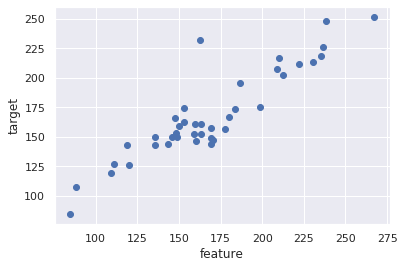

In [21]:
plt.scatter(y, lager_pred)
plt.xlabel('feature')
plt.ylabel('target')
plt.show()

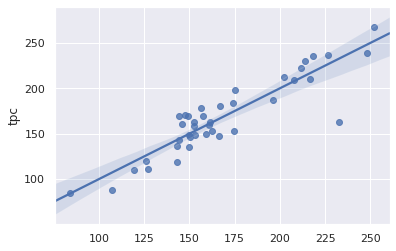

In [22]:
sns.regplot(lager_pred, y )

In [0]:
errors = y-lager_pred

In [0]:
box_errors = box_lager-lager_pred

In [0]:
log_errors = np.log(y)-lager_pred

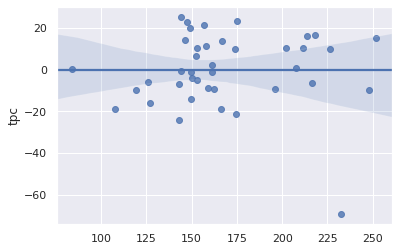

In [25]:
sns.regplot(lager_pred, errors)

In [31]:
np.mean(errors)

-2.4868995751603507e-14

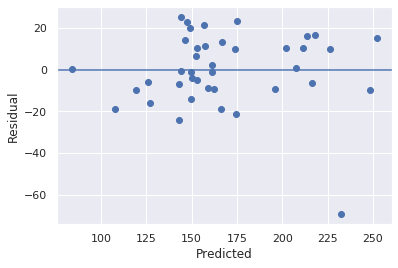

In [33]:
plt.scatter(lager_pred, errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y= 0)
plt.show()

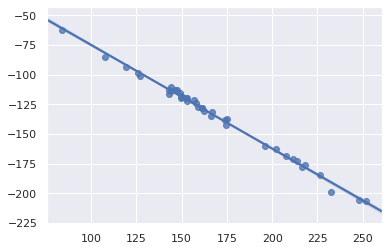

In [42]:
sns.regplot(lager_pred, box_errors)

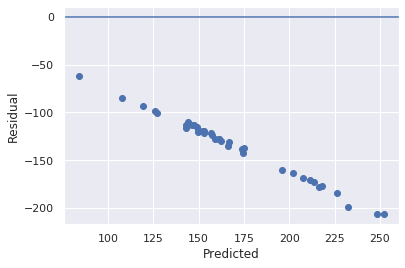

In [41]:
plt.scatter(lager_pred, box_errors)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y= 0)
plt.show()

In [46]:
from scipy.stats import bartlett 
from scipy.stats import levene
from scipy.stats import boxcox

bart_stats = bartlett(lager_pred, errors)
lev_stats = levene(lager_pred, errors)

print(bart_stats)
print(lev_stats)

box_bart = bartlett(lager_pred, box_errors)
box_lev = levene(lager_pred, box_errors)

print(box_bart)
print(box_lev)

bart_log = bartlett(lager_pred, log_errors)
lev_log = levene(lager_pred, log_errors)

print(bart_log)
print(lev_log)

BartlettResult(statistic=20.598126752511746, pvalue=5.665151962880338e-06)
LeveneResult(statistic=10.413460995442813, pvalue=0.0018298898881503544)
BartlettResult(statistic=0.6751207691533343, pvalue=0.41127195027322216)
LeveneResult(statistic=0.356036101485976, pvalue=0.5524439363394265)
BartlettResult(statistic=0.0014311425700817622, pvalue=0.9698228701278729)
LeveneResult(statistic=0.0007338316803004137, pvalue=0.9784576754853516)


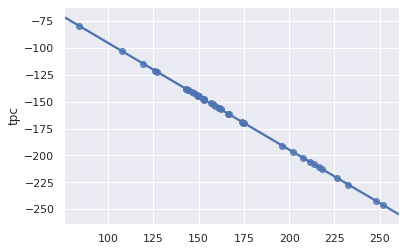

In [47]:
sns.regplot(lager_pred, log_errors)

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(x)
pd.Series([variance_inflation_factor(X.values, i)
    for i in range (X.shape[1])],
    index= X.columns)

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const    25.231110
ma        1.408874
dsa       2.752283
asa       1.824640
orac      1.631315
rp        2.357123
mca       1.485338
dtype: float64

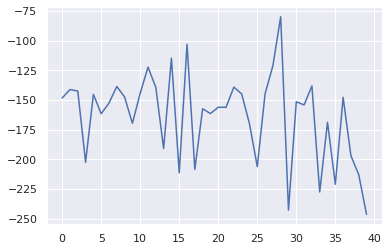

In [50]:
plt.plot(log_errors)
plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/stattools.py:541: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(msg, FutureWarning)


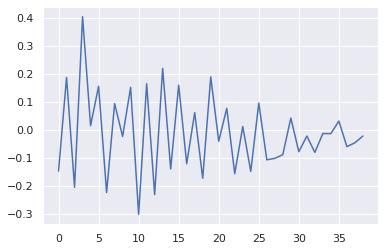

In [51]:
from statsmodels.tsa.stattools import acf

acf_data = acf(log_errors)

plt.plot(acf_data[1:]) 
plt.show()

In [52]:
x.corr()

,const,ma,dsa,asa,orac,rp,mca
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ma,NaN,1.000000,0.386925,0.263769,-0.065041,0.380178,0.316685
dsa,NaN,0.386925,1.000000,0.455170,0.536028,0.613243,0.540619
asa,NaN,0.263769,0.455170,1.000000,0.200306,0.661395,0.352252
orac,NaN,-0.065041,0.536028,0.200306,1.000000,0.318952,0.179106
rp,NaN,0.380178,0.613243,0.661395,0.318952,1.000000,0.374302
mca,NaN,0.316685,0.540619,0.352252,0.179106,0.374302,1.000000


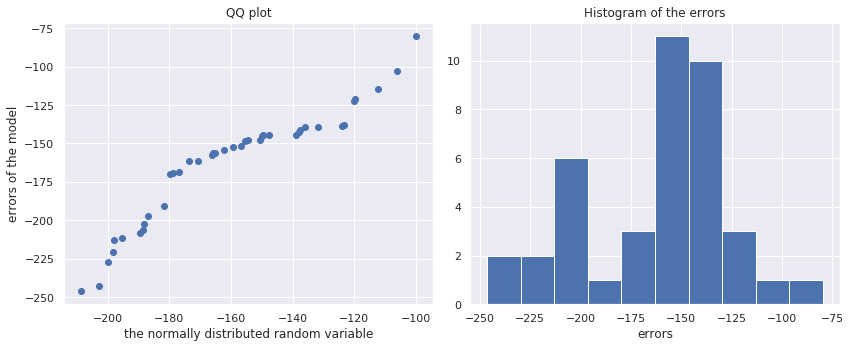

In [59]:
rand_nums = np.random.normal(np.mean(log_errors), np.std(log_errors), len(log_errors))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(log_errors)) # we sort the arrays 
plt.xlabel("the normally distributed random variable") 
plt.ylabel("errors of the model") 
plt.title("QQ plot")

plt.subplot(1,2,2) 
plt.hist(log_errors) 
plt.xlabel("errors") 
plt.title("Histogram of the errors")

plt.tight_layout() 
plt.show()

In [60]:
from scipy.stats import jarque_bera 
from scipy.stats import normaltest
jb_stats = jarque_bera(log_errors) 
norm_stats = normaltest(log_errors)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1])) 
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 1.316419783596413 and p value is 0.5177773829208324
Normality test statistics is 1.5794177967588245 and p value is 0.4539769294690629
